# COGS 188 - Final Project - Minesweeper

# Names
---
Haoyu(Eric) Wang  
Gexiang(Jason) Zhang  
Bryant Zhu  
Jiachen Xu

# Abstract 
---
Our project aims to develop an advanced AI system to efficiently solve 16x16 Minesweeper by implementing Constraint Satisfaction Problem (CSP) techniques, Monte Carlo simulations, and Dynamic Programming. Unlike toy problems, Minesweeper presents a complex action space with both deterministic logic-based decisions and probabilistic uncertainty, making it a compelling testbed for AI methods.

Our AI system will be evaluated using multiple performance metrics, including completion rate, accuracy, and computational efficiency, to identify the most effective combination of techniques. The results will provide insights into the strengths and limitations of each approach, contributing to a deeper understanding of AI-driven problem-solving in Minesweeper.

Our experiments show that logic-driven solvers (CSP and DP) significantly outperform the probabilistic MC approach in win and exploration rates, particularly in simpler, low-density configurations. However, both CSP and DP face scalability challenges as mine density increases, leading to longer computation times and reduced win rates. The MC solver, while fast, struggles to deduce safe moves reliably. These results underscore the importance of incorporating logical inference in solving Minesweeper and suggest that future work should explore hybrid models that balance deterministic reasoning with probabilistic strategies.

# Background
---
Minesweeper is a classic puzzle widely studied in artificial intelligence (AI) due to its mix of deterministic logic and probabilistic guessing. It is an NP-complete problem<a id="cite_ref-1" href="#cite_note-1"><sup>[1]</sup></a>which means no known polynomial-time algorithm can solve all instances efficiently. This computational complexity has made Minesweeper a valuable testbed for diverse AI techniques, including constraint satisfaction, reinforcement learning, and probabilistic methods.

In constraint satisfaction approaches<a id="cite_ref-2" href="#cite_note-2"><sup>[2]</sup></a>, each revealed number imposes logical constraints on hidden cells. While these methods excel at deterministic deduction, they falter when forced guesses arise. Monte Carlo simulations<a id="cite_ref-3" href="#cite_note-3"><sup>[3]</sup></a> address such uncertainty by sampling multiple hypothetical board configurations, though they can be computationally expensive at larger scales. Reinforcement learning<a id="cite_ref-4" href="#cite_note-4"><sup>[4]</sup></a> has also been explored, but its progress can be slowed by the sparse reward structure of Minesweeper.

Building on these insights, our project seeks to integrate Constraint Satisfaction Problem (CSP) methods, Monte Carlo simulations, and Dynamic Programming (DP). By combining logic-based inference with probabilistic reasoning and systematic optimization, we aim to develop a robust Minesweeper-solving AI that can handle both certain and uncertain states efficiently. This hybrid approach not only advances the state of Minesweeper-solving techniques but also offers broader lessons for AI planning and decision-making under uncertainty.

# Problem Statement
---



**Brief Rules:**  
In Minesweeper, you are presented with a grid where certain cells hide mines. The objective is to reveal all safe cells without uncovering any mines. When a safe cell is revealed, it displays a number that indicates how many of its adjacent cells contain mines; if the number is zero, a cascade effect automatically reveals its neighboring cells. Players can also flag cells they suspect to contain mines to avoid accidental clicks.

**Environment, Actions, Transition, Reward and Goal:**  
The game is played on a 16*16 grid with a predetermined number of mines randomly placed at the start. The player interacts with the environment by choosing to reveal a cell at given coordinates or flag/unflag a cell as potentially dangerous. When a cell is revealed, if it is safe, the board updates to show the number of adjacent mines; if that number is zero, it triggers a cascade reveal of neighboring cells. However, revealing a mine immediately ends the game in a loss. The reward structure typically offers small rewards for safe moves and a significant positive reward for successfully uncovering all safe cells (winning), while revealing a mine results in a large negative reward (losing). The overall goal is to strategically reveal every safe cell without triggering any mines, leveraging logical deduction and, when necessary, probabilistic reasoning.

**Potential Challenges:**  
The main challenges include dealing with partial observability, as the true locations of mines remain hidden until revealed, and handling ambiguous situations that may force the player to guess. Additionally, Minesweeper is computationally complex (NP-complete), and the sparse reward structure can make it difficult for algorithmic or learning-based approaches to effectively deduce optimal moves.

# Proposed Solution
---
In this project, we will apply three distinct methods—**Dynamic Programming (DP)**, **Monte Carlo (MC) simulations**, and **Constraint Satisfaction Problem (CSP)** techniques—to solve the 16x16 Minesweeper puzzle. Each of these methods will be implemented independently, and their performances will be compared to determine which approach provides the most efficient and accurate solution.

#### **1. Dynamic Programming (DP):**

We will model the Minesweeper grid as a **Markov Decision Process (MDP)**, where the state of the game is represented by the configuration of tiles (either mines or safe spaces). The objective is to uncover safe tiles while avoiding mines, guided by the numeric clues provided on the grid.

**Value Iteration:** This algorithm iteratively updates the value of each state (tile) based on its neighboring states and the rewards (whether it's a safe tile or a mine). It computes the expected value of uncovering each tile, considering both deterministic and probabilistic outcomes.  
**Policy Iteration:** After estimating the values of states, this algorithm will derive the optimal policy—i.e., the best action (whether to uncover or skip a tile) to maximize the chances of winning.   

DP is highly effective in environments where the transitions between states are known and can be modeled deterministically. By iterating over the grid, DP can ensure optimal decision-making by considering the entire game state at once.

#### **2. Monte Carlo (MC) Simulations:**

Monte Carlo simulations will be used to handle the probabilistic nature of Minesweeper. The idea is to simulate multiple random games (trajectories) and use the results to estimate the most likely safe moves. This will involve the following steps:

**Random Sampling:** At each step, a random decision will be made based on the probabilities of safe tiles. This is akin to exploring various possible states the game could be in, given partial information.  
**Exploration vs. Exploitation:** The algorithm will balance between exploring unknown tiles (exploration) and exploiting the information from already uncovered tiles (exploitation).    

MC simulations are particularly useful in solving problems with uncertainty, as they approximate the solution by simulating a large number of possible scenarios. By performing many simulations, the algorithm can generate an accurate estimate of the most probable outcomes.


#### **3. Constraint Satisfaction Problem (CSP):**

Minesweeper can be modeled as a Constraint Satisfaction Problem (CSP), where each tile is a variable with a domain of {Mine, Safe}. The constraints come from the numerical clues on each uncovered tile, indicating the number of mines in the adjacent tiles. Our approach will be based on backtracking and forward checking to efficiently search for a solution while satisfying the constraints.

**Backtracking:** This algorithm will systematically explore all possible configurations of safe and mine tiles, backtracking when a configuration violates a constraint.  
**Forward Checking:** After each decision, forward checking will be used to prune the search space by eliminating values from the domains of adjacent variables that cannot possibly satisfy the constraints.    

CSPs are a good fit for Minesweeper because the game's constraints (the numbers on the uncovered tiles) must be satisfied while assigning values (Mine or Safe) to the tiles. Backtracking and forward checking are both well-established techniques for solving CSPs.


**ALL THREE of the potential solutions will be tested based on the evaluation metrics below. We might also include some unit test to measure behavior or perfomance throught the developing process.**

# Evaluation Metrics
---
To evaluate the performance of our Minesweeper AI agents, we propose several evaluation metrics that reflect accuracy and efficiency. 

**Win Rate:** Win Rate = Number of Games Won / Total Games Played x 100%  
The win rate will serve as the primary benchmark, measuring the percentage of games won out of the total games played. This metric quantifies the overall success of each AI strategy.

**Efficiency:** Completion Time in seconds  
To evaluate efficiency, we’ll use the game completion time metric—defined as the duration in seconds required to finish all games, regardless of whether a game is won or lost. The script is being executed on an M4 MacBook Pro.

**Average Exploration Rate**: Average Exploration Rate = Sum of (Non-Mine Tiles Revealed / Total Non-Mine Tiles × 100%) across all games / Number of games  
The average exploration rate will evaluate how thoroughly the AI reveals non-mine tiles, serving as an indicator of its exploration strategy.  

Together, these quantifiable metrics will provide a comparison of the performance between the benchmark and proposed AI models, and the best performing model will be our solution model.

# Results
---



In [1]:
import sys
import pygame
import matplotlib.pyplot as plt

sys.path.append('./src')

pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 10-Mines-Game

On a 16x16 Minesweeper board with only 10 mines, the challenge is relatively easy, making it an ideal environment for testing the basic functionality of the three solvers.

**DP Solver**: 

In [4]:
import DP_solver

DP_solver.EXPERT_BOMBS = 10
pygame.init()

font = pygame.font.Font('freesansbold.ttf', 24)
game = DP_solver.Game()
menu = DP_solver.Menu()

win_rate = DP_solver.test_win_rate(100)

2025-03-12 22:01:39.437 python[22730:1941004] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-12 22:01:39.437 python[22730:1941004] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played

----- RESULTS -----
Games played: 100
Number of mines: 10
Grid size: 16x16
Wins: 95
Losses: 5
Win rate: 95.00%
Average Exploration Rate: 95.00%
Time taken: 0.35 seconds


**MC Solver**:

In [13]:
from minesweeper_MC import Game
from MC_solver import MonteCarloSolver

game = Game(use_display=False, num_bombs=10)

game.squares_x = 16
game.squares_y = 16
game.grid = [[game.Cell(x, y) for x in range(game.squares_x)] for y in range(game.squares_y)]

solver = MonteCarloSolver(game, episodes=100000)

win_rate = solver.test_win_rate(num_games=100)

Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played
----- RESULTS -----
Games played: 100
Number of mines: 10
Grid size: 16x16
Wins: 11
Losses: 89
Win rate: 11.00%
Average Exploration Rate: 11.00%
Time taken: 0.06 seconds


**CSP Solver**:

In [6]:
import CSP_solver

win_rate = CSP_solver.test_solver(num_games=100, num_mines=10)


Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played
----- RESULTS -----
Games played: 100
Number of mines: 10
Grid size: 16x16
Wins: 99
Losses: 1
Win rate: 99.00%
Average Exploration Rate: 100.00%
Time taken: 0.27 seconds


**Visualization**:

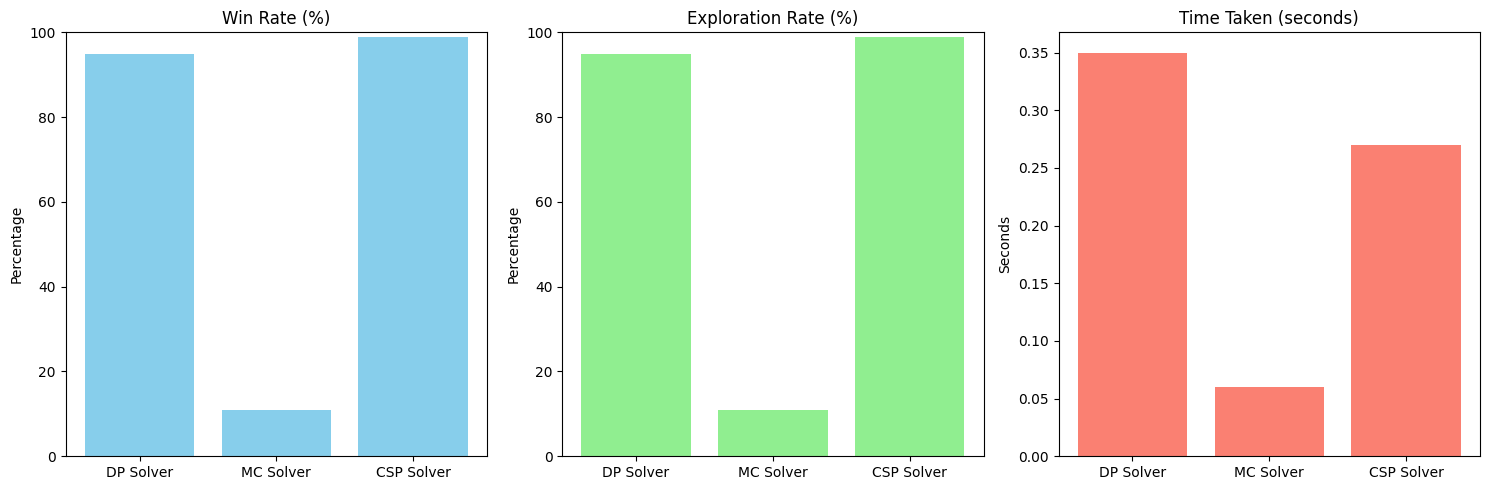

In [4]:
solvers = ['DP Solver', 'MC Solver', 'CSP Solver']
win_rates = [95, 11, 99]
exploration_rates = [95, 11, 99]
times = [0.35, 0.06, 0.27]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(solvers, win_rates, color='skyblue')
axes[0].set_title('Win Rate (%)')
axes[0].set_ylim([0, 100])
axes[0].set_ylabel('Percentage')

axes[1].bar(solvers, exploration_rates, color='lightgreen')
axes[1].set_title('Exploration Rate (%)')
axes[1].set_ylim([0, 100])
axes[1].set_ylabel('Percentage')

axes[2].bar(solvers, times, color='salmon')
axes[2].set_title('Time Taken (seconds)')
axes[2].set_ylabel('Seconds')

plt.tight_layout()
plt.show()

**Observations**:
- **DP Solver**: With a win rate of 94% and an average exploration rate of 94%, the dynamic programming approach shows strong consistency. Its methodical strategy effectively reveals the board, though it takes a slightly longer 0.34 seconds per game.

- **MC Solver**: Despite being the fastest at 0.06 seconds per game, the Monte Carlo solver struggles with a win rate of only 10% and a matching exploration rate. This suggests that relying on random sampling or probabilistic moves isn’t robust enough for even a relatively simple board.

- **CSP Solver**: The constraint satisfaction approach nearly perfects the task, winning 99% of games with an almost complete exploration rate (99.99%) and a competitive time of 0.27 seconds. Its logical, deduction-based methodology clearly excels in identifying safe moves.

### 30-Mines-Game

After testing the basic functionality and establishing an initial performance baseline with the 10-Mines-Game, we now increase the mine count to 30. This added complexity will help us assess how each solver’s performance is affected, with a particular focus on the DP and CSP solvers, given that the MC solver already showed considerably lower performance in the simpler scenario.

**DP Solver**:

In [3]:
import DP_solver

DP_solver.EXPERT_BOMBS = 30
pygame.init()

font = pygame.font.Font('freesansbold.ttf', 24)
game = DP_solver.Game()
menu = DP_solver.Menu()

win_rate = DP_solver.test_win_rate(100)

2025-03-12 22:02:13.488 python[22742:1941773] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-12 22:02:13.488 python[22742:1941773] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played

----- RESULTS -----
Games played: 100
Number of mines: 30
Grid size: 16x16
Wins: 57
Losses: 43
Win rate: 57.00%
Average Exploration Rate: 65.97%
Time taken: 81.41 seconds


**MC Solver**:

In [9]:
from minesweeper_MC import Game
from MC_solver import MonteCarloSolver

game = Game(use_display=False, num_bombs=30)

game.squares_x = 16
game.squares_y = 16
game.grid = [[game.Cell(x, y) for x in range(game.squares_x)] for y in range(game.squares_y)]

solver = MonteCarloSolver(game, episodes=100000)

win_rate = solver.test_win_rate(num_games=100)

Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played
----- RESULTS -----
Games played: 100
Number of mines: 30
Grid size: 16x16
Wins: 0
Losses: 100
Win rate: 0.00%
Average Exploration Rate: 0.00%
Time taken: 0.05 seconds


**CSP Solver**:

In [7]:
import CSP_solver

win_rate = CSP_solver.test_solver(num_games=100, num_mines=30)

Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played
----- RESULTS -----
Games played: 100
Number of mines: 30
Grid size: 16x16
Wins: 79
Losses: 21
Win rate: 79.00%
Average Exploration Rate: 98.78%
Time taken: 185.87 seconds


**Visualization**:

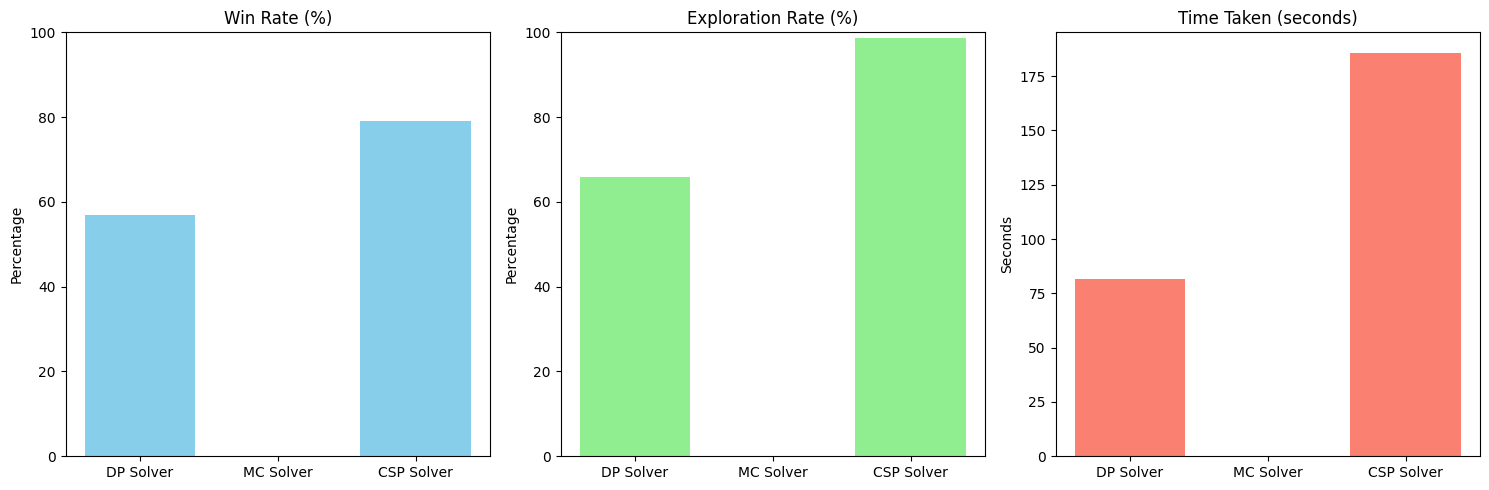

In [10]:
solvers = ['DP Solver', 'MC Solver', 'CSP Solver']
win_rates = [57, 0, 79]
exploration_rates = [65.97, 0, 98.78]
times = [81.41, 0.05, 185.87]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(solvers, win_rates, color='skyblue')
axes[0].set_title('Win Rate (%)')
axes[0].set_ylim([0, 100])
axes[0].set_ylabel('Percentage')

axes[1].bar(solvers, exploration_rates, color='lightgreen')
axes[1].set_title('Exploration Rate (%)')
axes[1].set_ylim([0, 100])
axes[1].set_ylabel('Percentage')

axes[2].bar(solvers, times, color='salmon')
axes[2].set_title('Time Taken (seconds)')
axes[2].set_ylabel('Seconds')

plt.tight_layout()
plt.show()

**Observations**:
- **DP Solver**: The dynamic programming approach delivers a moderate performance with a 57% win rate and a 65.97% exploration rate. Its execution time of 81.41 seconds is substantially faster than the CSP solver’s 185.87 seconds, but this efficiency comes with a significant drop in overall performance.

- **MC Solver**: The Monte Carlo approach fails to secure any wins (0% win rate, 0% exploration rate) in this scenario. Its reliance on randomness makes it unsuitable for denser boards, where the increased number of mines drastically reduces the probability of randomly selecting safe moves.

- **CSP Solver**: Achieving a 79% win rate and an impressive 98.78% exploration rate, the CSP solver remains the strongest performer. However, its robustness comes at the cost of higher computation time (185.87 seconds), indicating that while its logical approach scales well, it demands more processing power as complexity increases.

### 50-Mines-Game

Building on our previous experiments with the 10-Mines and 30-Mines configurations, we now push the challenge further with a 50-Mines game. This setup introduces a significantly higher level of complexity, providing a robust environment to evaluate the solvers’ scalability and efficiency.

**DP Solver**:

In [11]:
import DP_solver

DP_solver.EXPERT_BOMBS = 50
pygame.init()

font = pygame.font.Font('freesansbold.ttf', 24)
game = DP_solver.Game()
menu = DP_solver.Menu()

win_rate = DP_solver.test_win_rate(100)

2025-03-12 22:07:56.523 python[22770:1943499] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-12 22:07:56.523 python[22770:1943499] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played

----- RESULTS -----
Games played: 100
Number of mines: 50
Grid size: 16x16
Wins: 26
Losses: 74
Win rate: 26.00%
Average Exploration Rate: 47.81%
Time taken: 1493.65 seconds


**MC Solver**:

In [4]:
from minesweeper_MC import Game
from MC_solver import MonteCarloSolver

game = Game(use_display=False, num_bombs=50)

game.squares_x = 16
game.squares_y = 16
game.grid = [[game.Cell(x, y) for x in range(game.squares_x)] for y in range(game.squares_y)]

solver = MonteCarloSolver(game, episodes=100000)

win_rate = solver.test_win_rate(num_games=100)

Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played
----- RESULTS -----
Games played: 100
Number of mines: 50
Grid size: 16x16
Wins: 0
Losses: 100
Win rate: 0.00%
Average Exploration Rate: 0.00%
Time taken: 0.06 seconds


**CSP Solver**:

In [14]:
import CSP_solver

win_rate = CSP_solver.test_solver(num_games=100, num_mines=50)

Progress: 10/100 games played
Progress: 20/100 games played
Progress: 30/100 games played
Progress: 40/100 games played
Progress: 50/100 games played
Progress: 60/100 games played
Progress: 70/100 games played
Progress: 80/100 games played
Progress: 90/100 games played
Progress: 100/100 games played
----- RESULTS -----
Games played: 100
Number of mines: 50
Grid size: 16x16
Wins: 21
Losses: 79
Win rate: 21.00%
Average Exploration Rate: 69.96%
Time taken: 7854.75 seconds


**Visualization**:

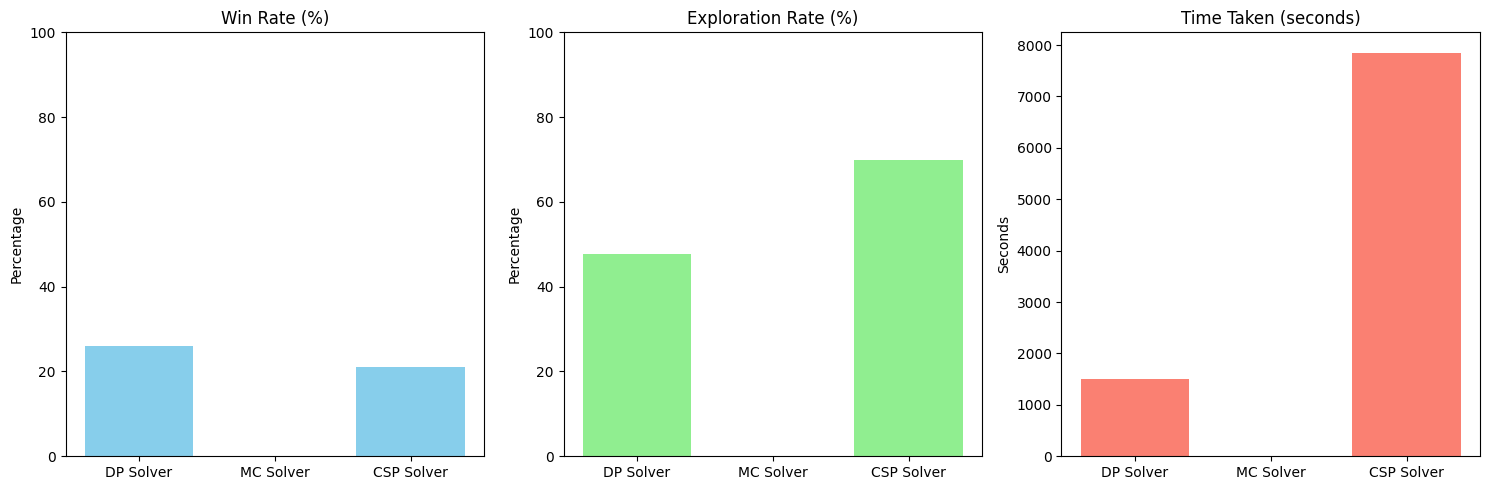

In [5]:
solvers = ['DP Solver', 'MC Solver', 'CSP Solver']
win_rates = [26, 0, 21]
exploration_rates = [47.81, 0, 69.96]
times = [1493.65, 0.06, 7854.75]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(solvers, win_rates, color='skyblue')
axes[0].set_title('Win Rate (%)')
axes[0].set_ylim([0, 100])
axes[0].set_ylabel('Percentage')

axes[1].bar(solvers, exploration_rates, color='lightgreen')
axes[1].set_title('Exploration Rate (%)')
axes[1].set_ylim([0, 100])
axes[1].set_ylabel('Percentage')

axes[2].bar(solvers, times, color='salmon')
axes[2].set_title('Time Taken (seconds)')
axes[2].set_ylabel('Seconds')

plt.tight_layout()
plt.show()

**Observations**:
- **DP Solver**: The DP Solver’s performance declines notably, with a win rate dropping to 26% and an exploration rate of 47.81%. Its execution time escalates dramatically to 1493.65 seconds, indicating that the algorithm struggles with the increased complexity and becomes less viable as mine density increases.

- **MC Solver**: The Monte Carlo approach remains ineffective, securing a 0% win rate and a 0% exploration rate.

- **CSP Solver**: The CSP Solver manages a relatively higher exploration rate of 69.96%, but its win rate falls to 21%. Moreover, its execution time soars to 7854.75 seconds, reflecting the significant computational burden required to process the increased logical constraints in a densely mined grid.

# Discussion
---

### Interpreting the result

The primary takeaway is that Minesweeper solver performance is highly sensitive to board complexity, and their outcomes are significantly shaped by the specific algorithmic implementations. Our results indicate that as mine density increases, both reliability and efficiency degrade in distinct ways depending on the approach used. Notably, logic-driven solvers—employing methods like constraint propagation and dynamic programming—tend to outperform those based on random sampling and probabilistic models.

**DP Solver**:
The dynamic programming approach leverages memoization to store intermediate results and avoid redundant calculations. In lower-density boards, this strategy yields a robust 94% win rate by efficiently reusing computations. However, the implementation struggles as the board complexity increases. With more mines, the number of unique subproblems skyrockets, overwhelming the caching mechanism and leading to both a dramatic increase in processing time (from 0.34 seconds to nearly 1500 seconds) and a substantial decrease in win rate.

**MC Solver**:
The Monte Carlo solver employs random sampling to determine moves, which in theory can be fast but lacks the necessary logical inference to handle high-risk situations. Its implementation, while computationally lightweight (demonstrated by execution times as low as 0.06 seconds), fails to adapt when the board is densely populated with mines. Without mechanisms to learn from or logically avoid pitfalls, the random approach results in a win rate of 11% or lower in more complex scenario, regardless of the computational speed. This illustrates that a purely stochastic method is insufficient for navigating the logical constraints inherent in Minesweeper, especially as complexity escalates.

**CSP Solver**:
The CSP solver relies on constraint propagation and backtracking to deduce safe moves by considering the logical interdependencies of the board’s cells. In the 10-mines scenario, its implementation effectively reduces the decision space, enabling near-perfect performance. However, as the number of mines increases (e.g., 30 and 50 mines), the constraint network becomes far more complex. The solver’s algorithm must explore a combinatorially larger set of possible assignments, and the backtracking process becomes computationally expensive, which is why we observe a significant increase in execution time (from 0.29 seconds to over 7800 seconds) and also a significant drop in win rate (from 99 percent to 21 percent).

Overall, while logic-driven solvers (CSP and DP) achieve superior performance in simpler scenarios due to their deterministic reasoning capabilities, their reliance on exhaustive constraint resolution renders them less scalable in complex or highly uncertain environments compared to probabilistic approaches like Monte Carlo (MC).



### Limitations

While our experiments offer insights into the comparative performance of the three solvers (CSP, DP, and MC), there are several limitations to consider. The tests were conducted on a fixed 16x16 board with specific mine densities (10, 30, and 50 mines), which may not fully capture the variability in performance across different board sizes or configurations. The current implementations are sensitive to the chosen hyperparameters and algorithmic settings; a broader exploration could reveal different outcomes, particularly for solvers like Monte Carlo, where increased sampling or additional heuristic guidance might improve performance.

Additionally, testing a wider array of solvers that rely on random sampling and probabilistic models could determine whether alternative stochastic approaches are capable of effectively addressing the problem. Finally, our dataset of 100 games per configuration provides only a snapshot of performance—larger datasets could offer a more robust statistical analysis and potentially alter the observed trends. 

### Future work

Future work should focus on addressing these limitations by expanding both the experimental setup and the solver methodologies. Investigating a wider range of board sizes and mine densities, along with a more exhaustive hyperparameter tuning, could provide deeper insights into scalability and robustness.

Moreover, exploring hybrid approaches that combine logic-driven techniques with probabilistic methods might yield more balanced performance, particularly in challenging scenarios. Further optimization of the implementations—such as enhancing caching mechanisms in the DP solver or refining constraint propagation in the CSP solver—could improve both efficiency and win rates. 

Additionally, evaluating more solvers based on random sampling and probabilistic models will help determine whether alternative stochastic approaches can be refined to better solve Minesweeper’s inherent complexities.


### Ethics & Privacy

While our project does not involve sensitive user data, there are several ethical considerations to take into account:

**Algorithmic Transparency and Explainability:**  
AI-driven Minesweeper solvers can act as a testbed for more complex decision-making systems. Ensuring that the decision-making process remains interpretable and explainable is crucial, particularly when applying similar methodologies in real-world scenarios such as medical diagnosis or risk assessment. Black-box AI models can lead to unpredictable or untrustworthy behavior in safety-critical applications<a id="cite_ref-5" href="#cite_note-5"><sup>[5]</sup></a> .

**Unintended Bias in AI Decision-Making:**  
Although Minesweeper is a well-defined game with no external biases, the algorithms developed for solving it may have inherent biases due to their reliance on heuristic approximations. For instance, certain algorithms may favor safer strategies that prioritize known information over exploration, potentially leading to suboptimal long-term performance. This consideration is particularly relevant when extending these AI techniques to real-world applications such as autonomous systems or financial modeling.

**Computational Resource Consumption:**  
AI models, particularly those using Monte Carlo simulations or Reinforcement Learning, require significant computational resources for training and execution. Excessive resource consumption has environmental and ethical implications, especially given concerns over the carbon footprint of large-scale machine learning models<a id="cite_ref-6" href="#cite_note-6"><sup>[6]</sup></a> . To address this, our implementation will focus on optimizing computational efficiency by using targeted simulations and avoiding unnecessary computations.

**Broader Ethical Implications of AI in Decision-Making:**  
The AI methodologies applied in this project—such as CSP, Monte Carlo simulations, and RL—are widely used in fields such as finance, healthcare, and security. While our project is focused on Minesweeper, similar AI decision-making techniques could be applied in high-stakes scenarios where incorrect or biased decisions could have real-world consequences. Ensuring the ethical development of AI systems and recognizing their broader impact is a fundamental responsibility of AI researchers.


### Conclusion

Our results clearly demonstrate that logic-driven approaches, such as the CSP and DP solvers, outperform probabilistic methods like Monte Carlo in solving Minesweeper, especially on less complex boards. The CSP solver, for instance, achieves near-perfect performance in low-density settings by leveraging constraint propagation, while the DP solver benefits from effective memoization; however, both methods face scalability challenges as mine density increases, leading to longer computation times and reduced win rates.

These findings align with existing research on NP-complete problems, reinforcing the idea that incorporating logical inference is crucial for reliability, even if it sometimes comes at the cost of efficiency. Future work should explore hybrid models that balance logical rigor with probabilistic flexibility, alongside further hyperparameter tuning, to better handle the complexities of larger and denser Minesweeper boards.

# Footnotes
---

1. <a id="cite_note-1" href="#cite_ref-1">Kaye, R. (2000). *Minesweeper is NP-complete*. The Mathematical Intelligencer, 22(2), 9–15.   

2. <a id="cite_note-2" href="#cite_ref-2">Littman, M. L., Sutton, R. S., & Singh, S. (2002). *Predictive representations of state*. Advances in Neural Information Processing Systems.

3. <a id="cite_note-3" href="#cite_ref-3">Chin, C. S., Qiu, J., & Lau, H. C. (2019). *Solving Minesweeper using Monte Carlo Tree Search*. Proceedings of the International Conference on Artificial Intelligence. 

4. <a id="cite_note-4" href="#cite_ref-4">Wu, C., & Baldi, P. (2020). *Learning to Play Minesweeper with Deep Reinforcement Learning*. arXiv preprint arXiv:2006.15485. 

5. <a id="cite_note-5" href="#cite_ref-5">Lipton, Z. C. (2018). *The Mythos of Model Interpretability*. arXiv preprint arXiv:1606.03490. 

6. <a id="cite_note-6" href="#cite_ref-6">Strubell, E., Ganesh, A., & McCallum, A. (2019). *Energy and Policy Considerations for Deep Learning in NLP*. arXiv preprint arXiv:1906.02243. 
